In [1]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

In [2]:
df = pd.read_csv('../data/raw/arquivo_geral.csv', sep=';', parse_dates=['data'])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2214 entries, 0 to 2213
Data columns (total 7 columns):
regiao              2214 non-null object
estado              2214 non-null object
data                2214 non-null datetime64[ns]
casosNovos          2214 non-null int64
casosAcumulados     2214 non-null int64
obitosNovos         2214 non-null int64
obitosAcumulados    2214 non-null int64
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 121.2+ KB


In [4]:
new_cases = df.groupby(['data']).agg({
    'casosNovos': 'sum'
})

In [26]:
def plot_ts(series):
    fig, ax = plt.subplots(3, 2, figsize=(15, 17));
    series.plot(ax=ax[0, 0]);
    plot_acf(series, ax=ax[0, 1], lags=50)
    plot_pacf(series, ax=ax[1, 1], lags=50)
    series.plot.hist(bins=20, ax=ax[1, 0]);
    series.rolling('7D').std().plot(ax=ax[2, 0]);
    series.rolling('7D').mean().plot(ax=ax[2, 1]);
    
    

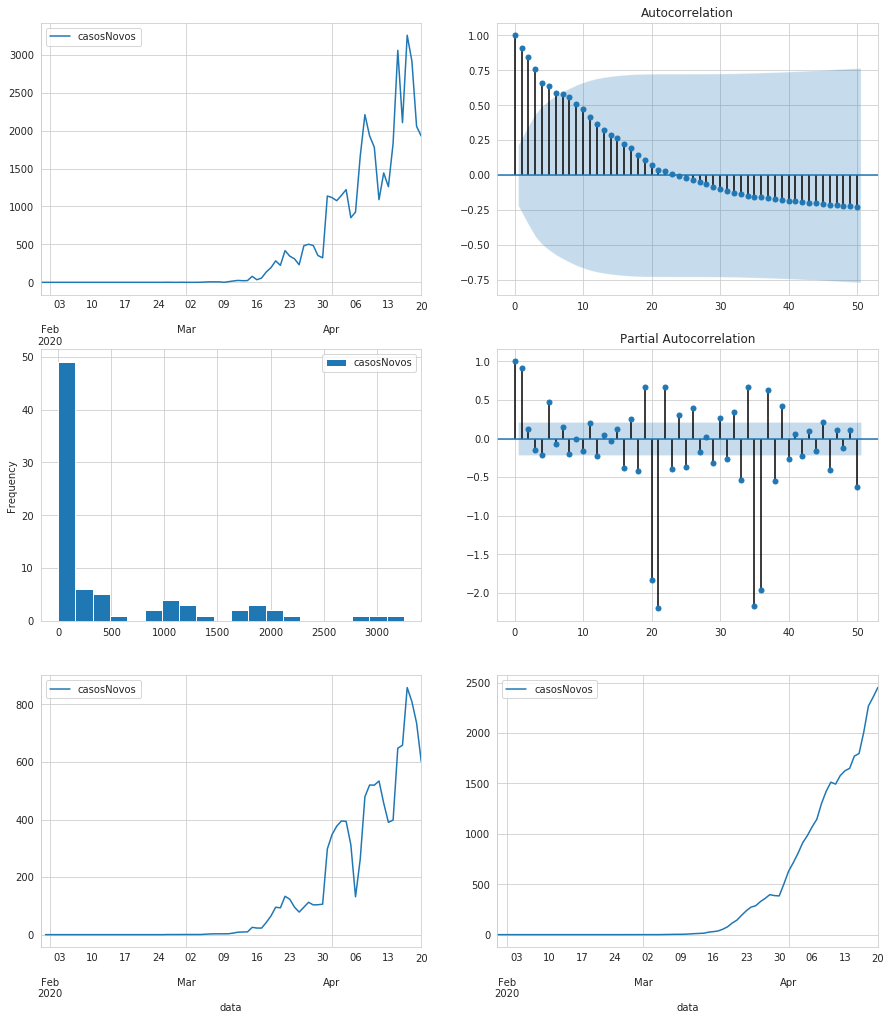

In [27]:
plot_ts(new_cases)

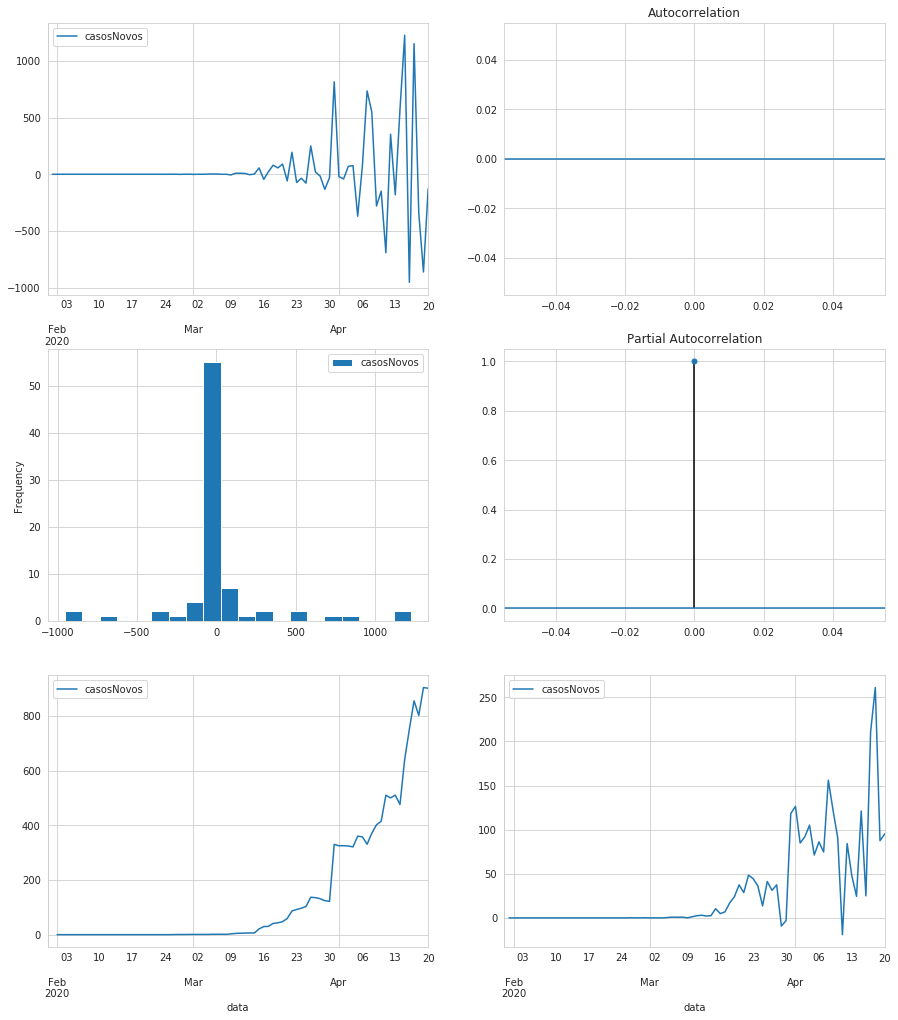

In [53]:
plot_ts(new_cases.diff())

<Figure size 1080x1224 with 0 Axes>

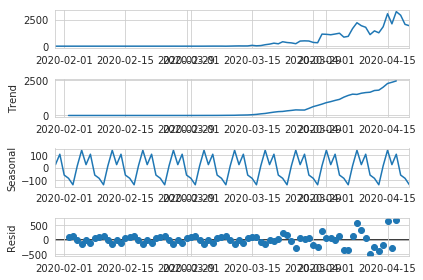

In [50]:
from statsmodels.tsa.seasonal import seasonal_decompose

fig = plt.figure(figsize=(15, 17));
result = seasonal_decompose(new_cases, model='aditive')
result.plot()
plt.show()

<Figure size 1080x1224 with 0 Axes>

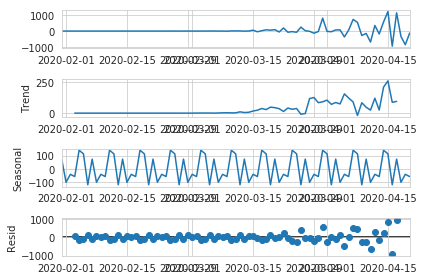

In [52]:
from statsmodels.tsa.seasonal import seasonal_decompose

fig = plt.figure(figsize=(15, 17));
result = seasonal_decompose(new_cases.diff()[1:], model='aditive')
result.plot()
plt.show()